# ASSIGNMENT 4

In [66]:
# importinng required libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [67]:
# importing dataset
data=pd.read_csv("delivery_time.csv")

In [68]:
# Display the data
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [69]:
# renaming the column names" As the varibales are nor appropriate"
dataset=data.rename({"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and DATA VISUALISATION & CORRELATION

In [70]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


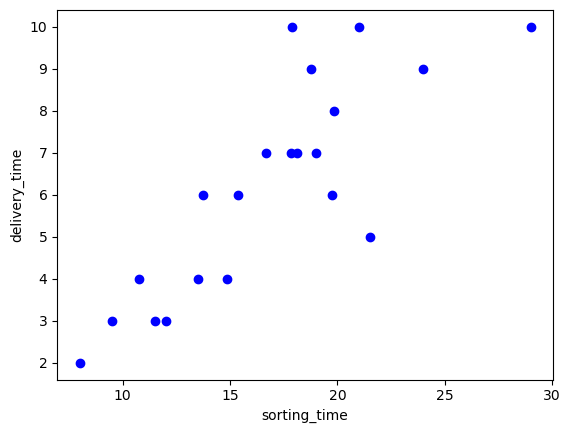

In [71]:
# scatterplot that shows the association between 
plt.plot(dataset.delivery_time,dataset.sorting_time, "bo")
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.show()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

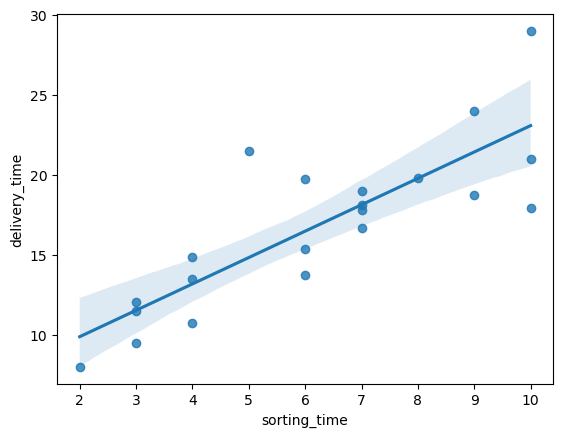

In [72]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

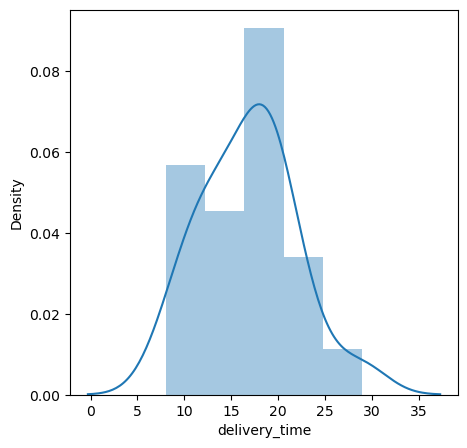

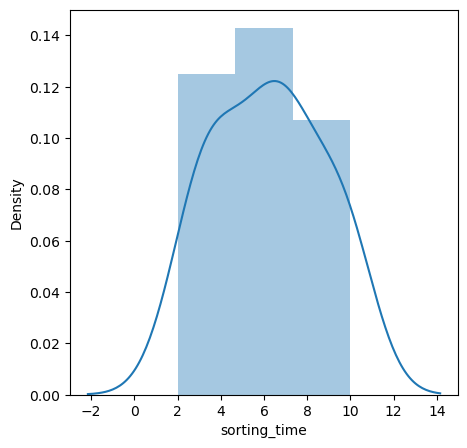

In [73]:
plt.figure(figsize=(5,5))
sns.distplot(dataset.delivery_time)
plt.show()
plt.figure(figsize=(5,5))
sns.distplot(dataset.sorting_time)
plt.show()

# Data information

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Building model

In [75]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        17:29:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
new_data=pd.Series([5,7,8])
newdata_pred=pd.DataFrame(new_data,columns=["sorting_time"])

In [77]:
newdata_pred

,sorting_time
0,5
1,7
2,8


# Making predictions using model

In [78]:
model.predict(newdata_pred)

0    14.827833
1    18.125873
2    19.774893
dtype: float64

In [79]:
# Reading data
data1=pd.read_csv("Salary_Data.csv")
data1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [80]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [81]:
#  correlation between two variables
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


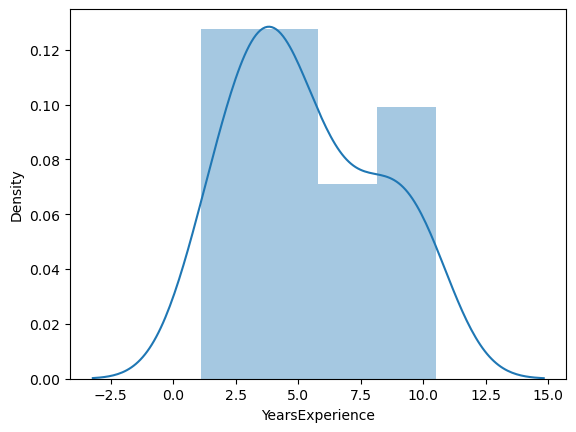

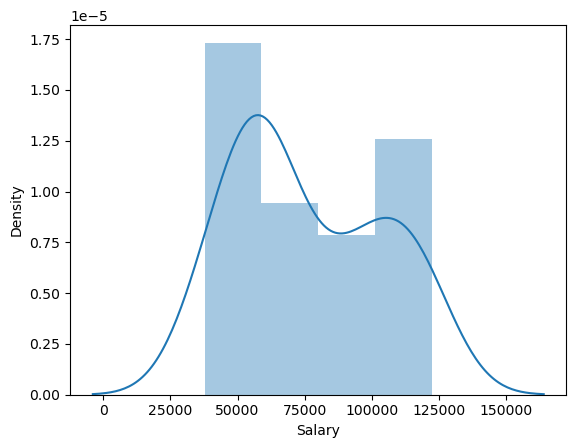

In [82]:
# data visualization
sns.distplot(data1['YearsExperience'])
plt.show()
sns.distplot(data1.Salary)
plt.show()


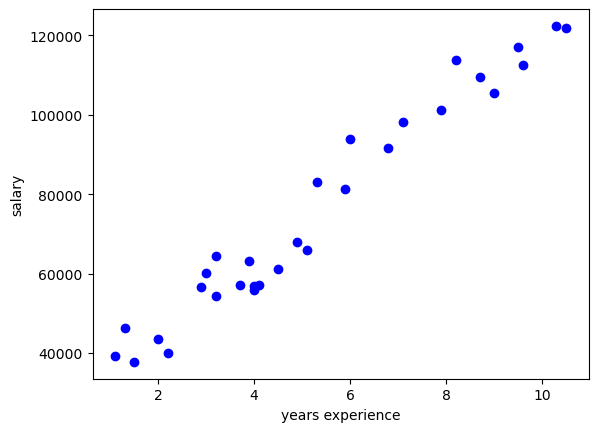

In [83]:
plt.plot(data1.YearsExperience,data1.Salary,"bo")
plt.xlabel("years experience")
plt.ylabel("salary")
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

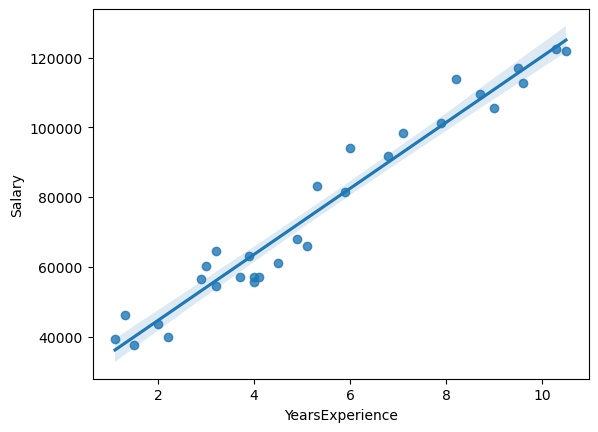

In [84]:
# to plot regression plot and get "best fit line"
sns.regplot(x=data1.YearsExperience,y=data1.Salary)

In [85]:
# Building model
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        17:29:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [87]:
#Square Root transformation on data
model1 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)',data =data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           7.58e-19
Time:                        17:29:18   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#Cuberoot transformation on Data
model2 = smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)',data=data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           6.37e-18
Time:                        17:29:18   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
#Log transformation on Data
model3 = smf.ols('np.log(Salary)~np.log(YearsExperience)',data=data1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           7.40e-16
Time:                        17:29:18   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# Predicting for these values
new_data1=pd.Series([12.3,34.6,14.2])
new_data1

0    12.3
1    34.6
2    14.2
dtype: float64

In [91]:
new_data1_pred=pd.DataFrame(new_data1,columns=["YearsExperience"])
new_data1_pred

,YearsExperience
0,12.3
1,34.6
2,14.2


In [92]:
# Model to predict the salary when yearsof experience is given
model.predict(new_data1_pred)

0    142026.736753
1    352760.896521
2    159981.665163
dtype: float64

# --------------------------------------------------------------------------------------------------------------